# Phase Plane

Dynamical system

The evaluated system is the following

$$
\begin{align*}
    \dot{x_1} &= x_2\\
    \dot{x_2} &= x_2 + x_1 - x_1^3
\end{align*}
$$

In [89]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp, DOP853

In [107]:
# System ODE
def system_ode(t, x):
    return [x[1], x[1] + x[0] - x[0]**3]

def solve_diffeq(func, t, tspan, ic, parameters={}, algorithm='DOP853', stepsize=np.inf):
    return solve_ivp(fun=func, t_span=tspan, t_eval=t, y0=ic, method=algorithm, 
                     args=tuple(parameters.values()), atol=1e-8, rtol=1e-5, max_step=stepsize)

# def solve_diffeq(func, t, tspan, ic, parameters={}, algorithm='DOP853'):
#     return solve_ivp(fun=func, t_span=tspan, t_eval=t, y0=ic, method=algorithm, 
#                      args=tuple(parameters.values()), atol=1e-8, rtol=1e-5, )

def phasePlane(x1, x2, func):
    X1, X2 = np.meshgrid(x1, x2)  # create grid
    u, v = np.zeros(X1.shape), np.zeros(X2.shape)
    NI, NJ = X1.shape
    for i in range(NI):
        for j in range(NJ):
            x = X1[i, j]
            y = X2[i, j]
            dx = func(0, (x, y))  # compute values on grid
            u[i, j] = dx[0]
            v[i, j] = dx[1]
    M = np.hypot(u, v)
    u /= M
    v /= M
    return X1, X2, u, v, M

No trajectories plotted, so t range is meangingless (but must be given)

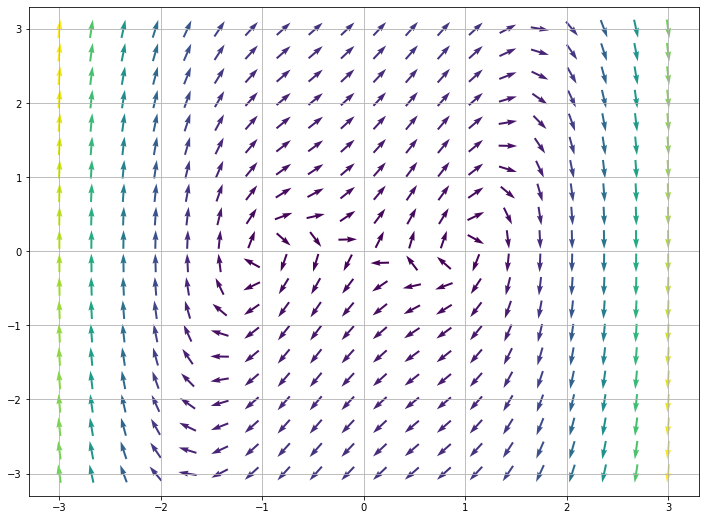

In [104]:
x1 = np.linspace(-3, 3, 20)
x2 = np.linspace(-3, 3, 20)

# Set up the figure the way we want it to look
plt.figure(figsize=(12, 9))
plt.clf()

X1, X2, dx1, dx2, M = phasePlane(
    x1, x2, system_ode
)

# Quiver plot
plt.quiver(X1, X2, dx1, dx2, M, scale=None, pivot='mid')
plt.grid()
plt.show()

Same plot with solution curves -- t range determines the time each trajectory is computed (backwards and forwards)

the form of the initial conditions is $[t_0, x(t_0), y(t_0)]$

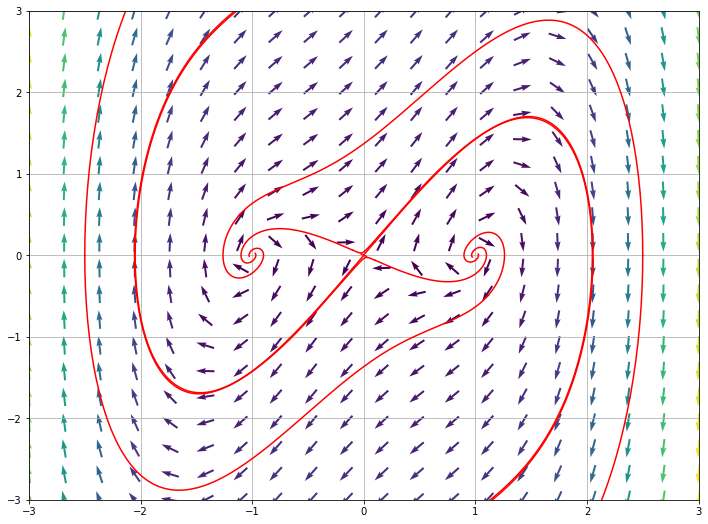

In [105]:
x0 = [
    [0.1, 0.162],
    [-0.1, -0.162],
    [0.1, -0.062],
    [-0.1, 0.062],
    [-2.5, 0],
    [2.5, 0]
]

x1 = np.linspace(-3, 3, 20)
x2 = np.linspace(-3, 3, 20)

# Set up the figure the way we want it to look
plt.figure(figsize=(12, 9))
plt.clf()

X1, X2, dx1, dx2, M = phasePlane(
    x1, x2, system_ode
)

# Quiver plot
plt.quiver(X1, X2, dx1, dx2, M, scale=None, pivot='mid')
plt.grid()

t1 = np.linspace(0, -8.0, 1000)
t2 = np.linspace(0, 8.0, 1000)
t_span1 = (np.max(t1), np.min(t1))
t_span2 = (np.min(t2), np.max(t2))
for x0i in x0:
    sol1 = solve_diffeq(system_ode, t1, t_span1, x0i)
    plt.plot(sol1.y[0, :], sol1.y[1, :], '-r')
    sol2 = solve_diffeq(system_ode, t2, t_span2, x0i)
    plt.plot(sol2.y[0, :], sol2.y[1, :], '-r')
           
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

(-1, 0) and (1, 0) are unstable spirals -- see this by forward integration

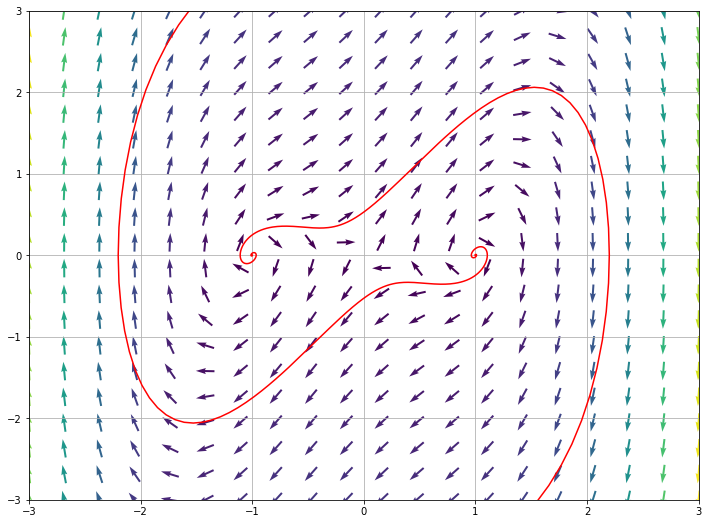

In [115]:
x0 = [
    [-1.001, 0.],
    [1.001, 0.],
]

x1 = np.linspace(-3, 3, 20)
x2 = np.linspace(-3, 3, 20)

# Set up the figure the way we want it to look
plt.figure(figsize=(12, 9))
plt.clf()

X1, X2, dx1, dx2, M = phasePlane(
    x1, x2, system_ode
)

# Quiver plot
plt.quiver(X1, X2, dx1, dx2, M, scale=None, pivot='mid')
plt.grid()

t1 = np.linspace(0, 20, 500)
t_span1 = (np.min(t1), np.max(t1))
for x0i in x0:
    sol1 = solve_diffeq(system_ode, t1, t_span1, x0i, stepsize=0.01)
    plt.plot(sol1.y[0, :], sol1.y[1, :], '-r')
plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.show()

It is possible to utilize the control library of python (from: [link](https://python-control.readthedocs.io/en/0.8.3/phaseplots.html))

Using logtime arrows

Using auto arrows



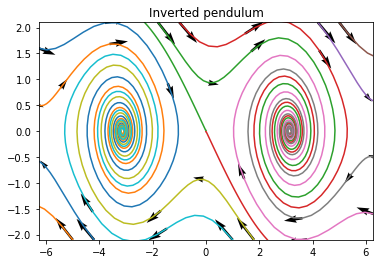

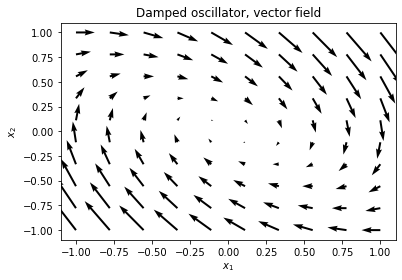

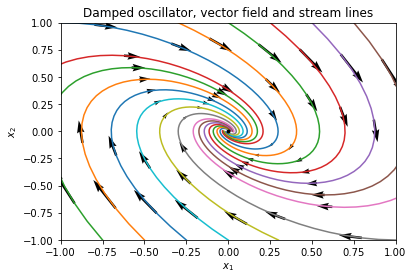

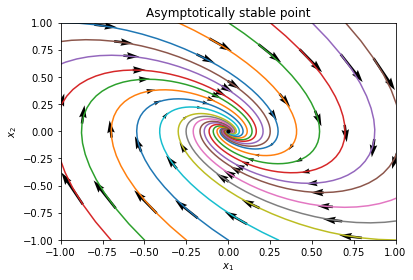

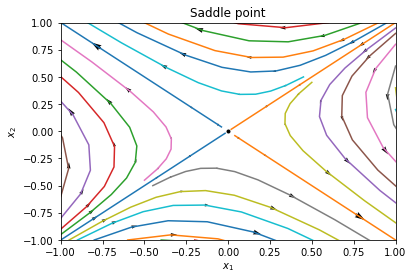

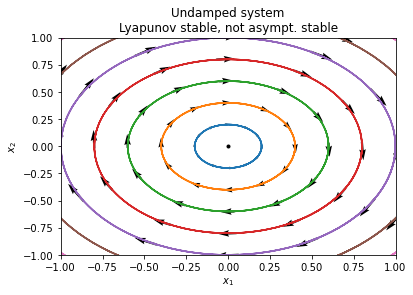

In [116]:
# phaseplots.py - examples of phase portraits
# RMM, 24 July 2011
#
# This file contains examples of phase portraits pulled from "Feedback
# Systems" by Astrom and Murray (Princeton University Press, 2009).

import os

import numpy as np
import matplotlib.pyplot as plt
from control.phaseplot import phase_plot
from numpy import pi

# Clear out any figures that are present
plt.close('all')

#
# Inverted pendulum
#

# Define the ODEs for a damped (inverted) pendulum
def invpend_ode(x, t, m=1., l=1., b=0.2, g=1):
    return x[1], -b/m*x[1] + (g*l/m)*np.sin(x[0])


# Set up the figure the way we want it to look
plt.figure()
plt.clf()
plt.axis([-2*pi, 2*pi, -2.1, 2.1])
plt.title('Inverted pendulum')

# Outer trajectories
phase_plot(
    invpend_ode,
    X0=[[-2*pi, 1.6], [-2*pi, 0.5], [-1.8, 2.1],
        [-1, 2.1], [4.2, 2.1], [5, 2.1],
        [2*pi, -1.6], [2*pi, -0.5], [1.8, -2.1],
        [1, -2.1], [-4.2, -2.1], [-5, -2.1]],
    T=np.linspace(0, 40, 200),
    logtime=(3, 0.7)
)

# Separatrices
phase_plot(invpend_ode, X0=[[-2.3056, 2.1], [2.3056, -2.1]], T=6, lingrid=0)

#
# Systems of ODEs: damped oscillator example (simulation + phase portrait)
#

def oscillator_ode(x, t, m=1., b=1, k=1):
    return x[1], -k/m*x[0] - b/m*x[1]


# Generate a vector plot for the damped oscillator
plt.figure()
plt.clf()
phase_plot(oscillator_ode, [-1, 1, 10], [-1, 1, 10], 0.15)
#plt.plot([0], [0], '.')
# a=gca; set(a,'FontSize',20); set(a,'DataAspectRatio',[1,1,1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Damped oscillator, vector field')

# Generate a phase plot for the damped oscillator
plt.figure()
plt.clf()
plt.axis([-1, 1, -1, 1])  # set(gca, 'DataAspectRatio', [1, 1, 1]);
phase_plot(
    oscillator_ode,
    X0=[
        [-1, 1], [-0.3, 1], [0, 1], [0.25, 1], [0.5, 1], [0.75, 1], [1, 1],
        [1, -1], [0.3, -1], [0, -1], [-0.25, -1], [-0.5, -1], [-0.75, -1], [-1, -1]
    ],
    T=np.linspace(0, 8, 80),
    timepts=[0.25, 0.8, 2, 3]
)
plt.plot([0], [0], 'k.')  # 'MarkerSize', AM_data_markersize*3)
# set(gca, 'DataAspectRatio', [1,1,1])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Damped oscillator, vector field and stream lines')

#
# Stability definitions
#
# This set of plots illustrates the various types of equilibrium points.
#


def saddle_ode(x, t):
    """Saddle point vector field"""
    return x[0] - 3*x[1], -3*x[0] + x[1]


# Asy stable
m = 1
b = 1
k = 1  # default values
plt.figure()
plt.clf()
plt.axis([-1, 1, -1, 1])  # set(gca, 'DataAspectRatio', [1 1 1]);
phase_plot(
    oscillator_ode,
    X0=[
        [-1, 1], [-0.3, 1], [0, 1], [0.25, 1], [0.5, 1], [0.7, 1], [1, 1], [1.3, 1],
        [1, -1], [0.3, -1], [0, -1], [-0.25, -1], [-0.5, -1], [-0.7, -1], [-1, -1],
        [-1.3, -1]
    ],
    T=np.linspace(0, 10, 100),
    timepts=[0.3, 1, 2, 3],
    parms=(m, b, k)
)
plt.plot([0], [0], 'k.')  # 'MarkerSize', AM_data_markersize*3)
# plt.set(gca,'FontSize', 16)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Asymptotically stable point')

# Saddle
plt.figure()
plt.clf()
plt.axis([-1, 1, -1, 1])  # set(gca, 'DataAspectRatio', [1 1 1])
phase_plot(
    saddle_ode,
    scale=2,
    timepts=[0.2, 0.5, 0.8],
    X0=[
        [-1, -1], [1, 1],
        [-1, -0.95], [-1, -0.9], [-1, -0.8], [-1, -0.6], [-1, -0.4], [-1, -0.2],
        [-0.95, -1], [-0.9, -1], [-0.8, -1], [-0.6, -1], [-0.4, -1], [-0.2, -1],
        [1, 0.95], [1, 0.9], [1, 0.8], [1, 0.6], [1, 0.4], [1, 0.2],
        [0.95, 1], [0.9, 1], [0.8, 1], [0.6, 1], [0.4, 1], [0.2, 1],
        [-0.5, -0.45], [-0.45, -0.5], [0.5, 0.45], [0.45, 0.5],
        [-0.04, 0.04], [0.04, -0.04]
    ],
    T=np.linspace(0, 2, 20)
)
plt.plot([0], [0], 'k.')  # 'MarkerSize', AM_data_markersize*3)
# set(gca,'FontSize', 16)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Saddle point')

# Stable isL
m = 1
b = 0
k = 1  # zero damping
plt.figure()
plt.clf()
plt.axis([-1, 1, -1, 1])  # set(gca, 'DataAspectRatio', [1 1 1]);
phase_plot(
    oscillator_ode,
    timepts=[pi/6, pi/3, pi/2, 2*pi/3, 5*pi/6, pi, 7*pi/6,
             4*pi/3, 9*pi/6, 5*pi/3, 11*pi/6, 2*pi],
    X0=[[0.2, 0], [0.4, 0], [0.6, 0], [0.8, 0], [1, 0], [1.2, 0], [1.4, 0]],
    T=np.linspace(0, 20, 200),
    parms=(m, b, k)
)
plt.plot([0], [0], 'k.')  # 'MarkerSize', AM_data_markersize*3)
# plt.set(gca,'FontSize', 16)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Undamped system\nLyapunov stable, not asympt. stable')

if 'PYCONTROL_TEST_EXAMPLES' not in os.environ:
    plt.show()

## Courtesy

Dr. Michael Joseph Leamy, ME 6444, Georgia Institute of Technology